In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
import matplotlib.pyplot as plt

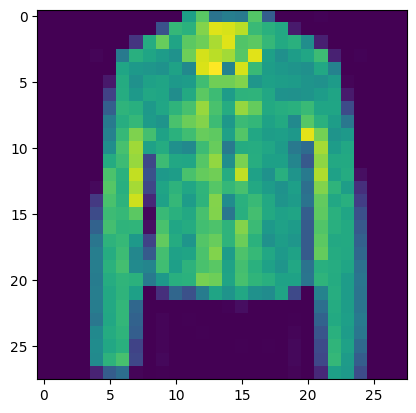

In [ ]:
plt.imshow(x_test[10])

In [ ]:
#normalise
x_train-x_train/255.0
x_test=x_test/255.0

In [ ]:
#flatten
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Dense(units=128,activation='relu',input_shape=(784,)))#input layer with 128 neurons

In [ ]:
model.add(tf.keras.layers.Dense(units=64,activation='relu'))#hidden layer 1

In [ ]:
model.add(tf.keras.layers.Dense(units=32,activation='relu'))#hidden layer 2

In [ ]:
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))#output layer

In [ ]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_crossentropy'])

In [ ]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 2.0766 - sparse_categorical_crossentropy: 2.0766
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.7547 - sparse_categorical_crossentropy: 1.7547
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 2.2413 - sparse_categorical_crossentropy: 2.2413
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 2.2445 - sparse_categorical_crossentropy: 2.2445
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 2.2032 - sparse_categorical_crossentropy: 2.2032
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 2.2727 - sparse_categorical_crossentropy: 2.2727
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.8099 - sparse_categorical_crossentropy: 1.8099
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 1.7556 - sparse_categorical_crossentropy: 1.7556
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 1.7829 - sparse_categorical_crossentropy: 

**bold text**Seconf Half  powerbi and python


In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)

n = 1000

departments = ["HR", "IT", "Finance", "Sales", "Marketing", "Operations"]
education_levels = ["Diploma", "Bachelor", "Master", "PhD"]

# base employee data
data = pd.DataFrame({
    "employee_id": range(1, n + 1),
    "age": np.random.randint(21, 60, n),
    "department": np.random.choice(departments, n),
    "education_level": np.random.choice(education_levels, n),
    "training_hours": np.random.randint(0, 121, n)
})

# years of experience (linked to age)
data["years_experience"] = ((data["age"] - 21) * np.random.uniform(0.5, 0.9, n)).astype(int)

# performance score (1 to 5)
data["performance_score"] = np.clip(
    2 + 0.05 * data["years_experience"] + 0.02 * data["training_hours"],
    1, 5
).round(1)

# salary by department
base_salary = {
    "HR": 400000,
    "IT": 700000,
    "Finance": 800000,
    "Sales": 600000,
    "Marketing": 550000,
    "Operations": 500000
}

data["salary"] = (
    data["department"].map(base_salary)
    + data["years_experience"] * 30000
    + data["performance_score"] * 50000
).astype(int)

# promotion flag
data["promotion_last_2yrs"] = np.where(
    (data["performance_score"] >= 4) & (data["years_experience"] >= 5),
    "Yes", "No"
)

# attrition risk
data["attrition_risk"] = np.where(
    data["performance_score"] < 3, "High",
    np.where(data["performance_score"] < 4, "Medium", "Low")
)

wlb_base = {
    "HR": 4.2,
    "IT": 3.2,
    "Finance": 3.4,
    "Sales": 3.0,
    "Marketing": 3.6,
    "Operations": 3.8
}
data["wlb_score"] = np.clip(
    data["department"].map(wlb_base)
    - 0.01 * data["training_hours"]
    + np.random.normal(0, 0.3, len(data)),
    1, 5
).round(1)

print(data.head())

   employee_id  age department education_level  training_hours  \
0            1   59         IT        Bachelor             102   
1            2   49    Finance          Master              38   
2            3   35         HR          Master             113   
3            4   28    Finance         Diploma              34   
4            5   41    Finance          Master               0   

   years_experience  performance_score   salary promotion_last_2yrs  \
0                32                5.0  1910000                 Yes   
1                19                3.7  1555000                  No   
2                10                4.8   940000                 Yes   
3                 5                2.9  1095000                  No   
4                16                2.8  1420000                  No   

  attrition_risk  wlb_score  
0            Low        2.2  
1         Medium        2.6  
2            Low        3.0  
3           High        2.8  
4           High        3.

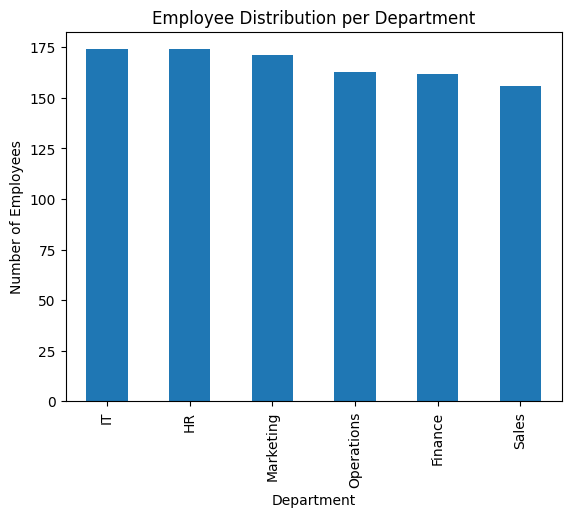

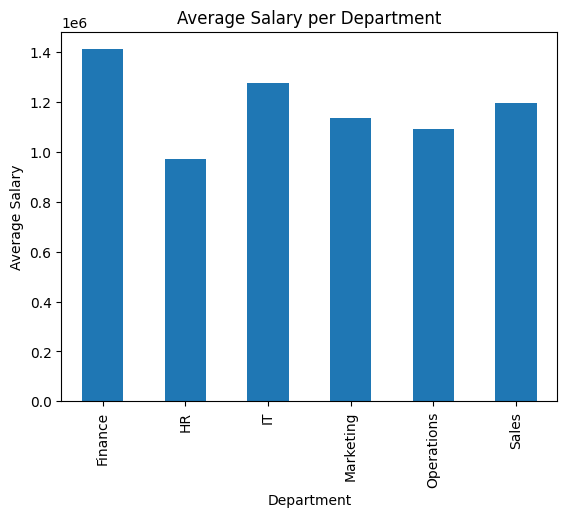

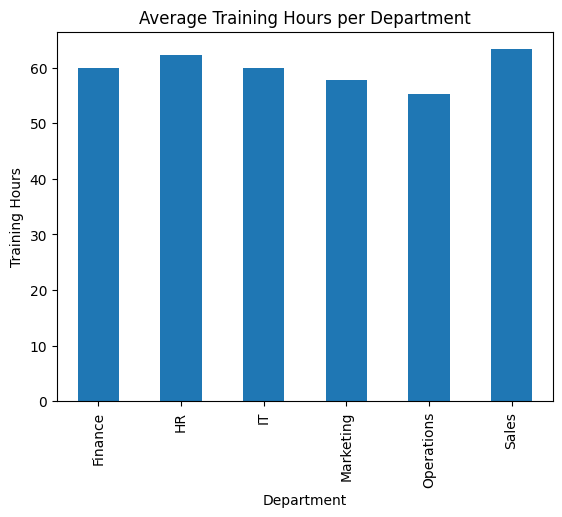

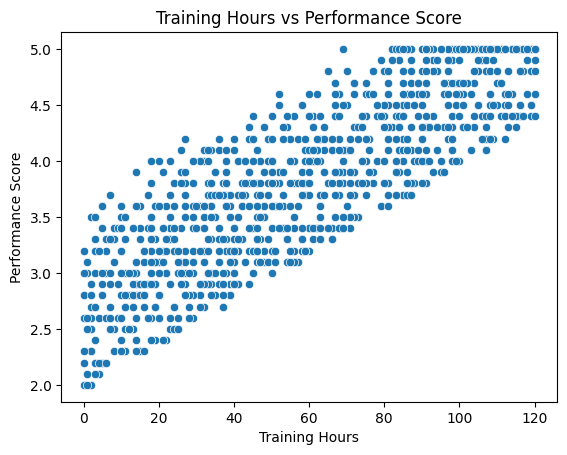

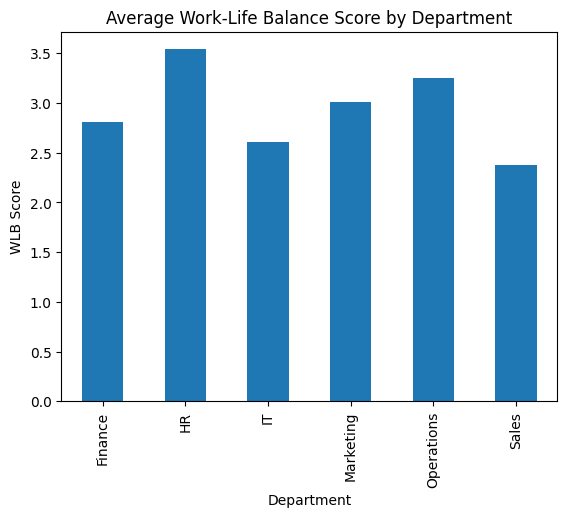

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Employee distribution per department
plt.figure()
data["department"].value_counts().plot(kind="bar")
plt.title("Employee Distribution per Department")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.show()


# 2. Average salary per department
plt.figure()
data.groupby("department")["salary"].mean().plot(kind="bar")
plt.title("Average Salary per Department")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.show()


# 3. Learning investment by department (training hours)
plt.figure()
data.groupby("department")["training_hours"].mean().plot(kind="bar")
plt.title("Average Training Hours per Department")
plt.xlabel("Department")
plt.ylabel("Training Hours")
plt.show()


# 4. Relationship between training and performance
plt.figure()
sns.scatterplot(
    x=data["training_hours"],
    y=data["performance_score"]
)
plt.title("Training Hours vs Performance Score")
plt.xlabel("Training Hours")
plt.ylabel("Performance Score")
plt.show()


# 5. Department-wise work-life balance health
plt.figure()
data.groupby("department")["wlb_score"].mean().plot(kind="bar")
plt.title("Average Work-Life Balance Score by Department")
plt.xlabel("Department")
plt.ylabel("WLB Score")
plt.show()


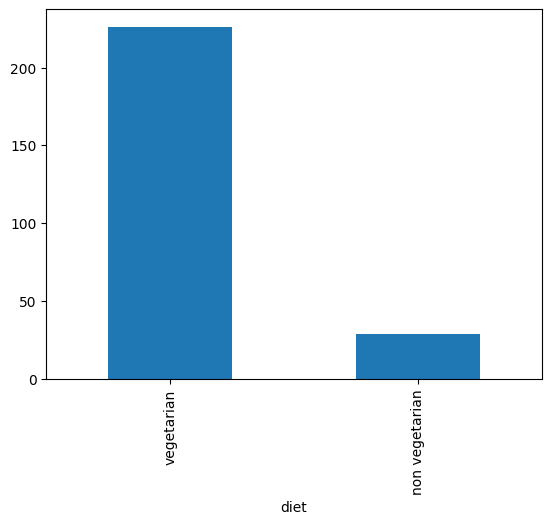

Unique Dishes: 255


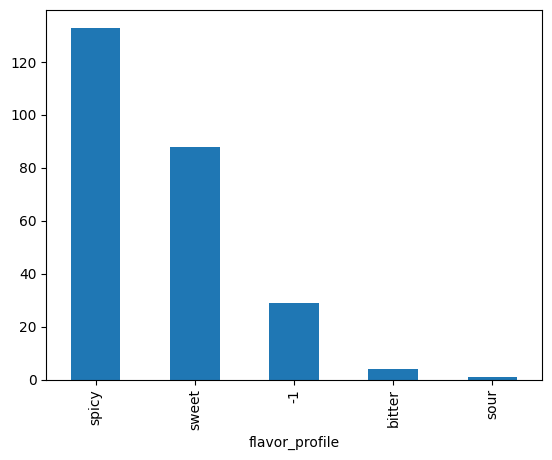

In [ ]:
#Q2 ANSWER 2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df=pd.read_csv("indian_food.csv")
df.head()

#visualisation 1 -	Count of vegetarian and non-vegetarian consumers using bar graph
plt.figure()
df['diet'] = df['diet'].value_counts().plot(kind="bar")
plt.show()
#visualisation 2 -	Count of unique dishes in this dataset
print(f"Unique Dishes: {df['name'].nunique()}")
#visualisation 3 - 	Count of unique flavored dishes in this dataset
plt.figure()
df['flavor_profile']=df['flavor_profile'].value_counts().plot(kind='bar')
plt.show()

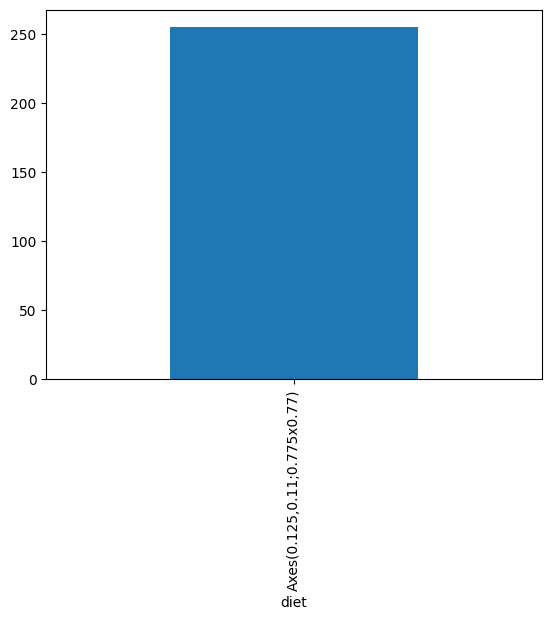

Unique Dishes: 255


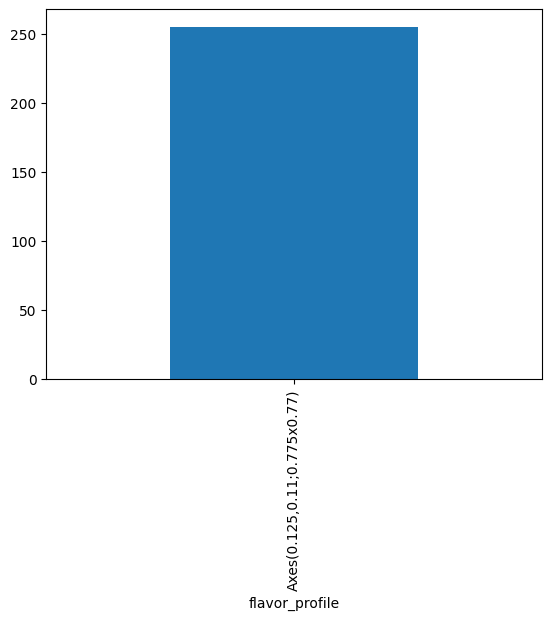